<a href="https://colab.research.google.com/github/ChandrakantPrajapat/Aerospace-Propulsion-Diagrams/blob/main/Aerospace_Propulsion_Diagrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

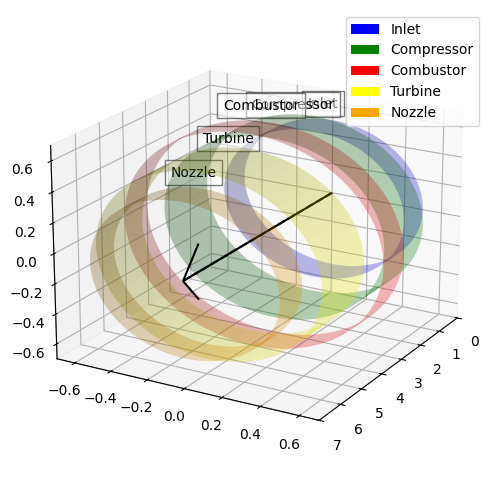

In [ ]:
# Import required libraries (pre-installed in Colab)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

# Define function to plot a 3D cylinder
def plot_cylinder(ax, a, b, r, color, alpha=0.3):
    """
    Plots a cylinder along the x-axis from x=a to x=b with radius r and given color.
    Alpha controls transparency for a realistic effect.
    """
    try:
        theta = np.linspace(0, 2*np.pi, 100)
        x = np.linspace(a, b, 100)
        X, Theta = np.meshgrid(x, theta)
        Y = r * np.cos(Theta)
        Z = r * np.sin(Theta)
        ax.plot_surface(X, Y, Z, color=color, alpha=alpha)
    except Exception as e:
        print(f"Error plotting cylinder: {e}")

# List of jet engine components with parameters
components = [
    {'a': 0, 'b': 1, 'r': 0.5, 'color': 'blue', 'label': 'Inlet'},
    {'a': 1, 'b': 3, 'r': 0.6, 'color': 'green', 'label': 'Compressor'},
    {'a': 3, 'b': 4, 'r': 0.7, 'color': 'red', 'label': 'Combustor'},
    {'a': 4, 'b': 6, 'r': 0.6, 'color': 'yellow', 'label': 'Turbine'},
    {'a': 6, 'b': 7, 'r': 0.5, 'color': 'orange', 'label': 'Nozzle'},
]

# Set up figure and 3D axes
try:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
except Exception as e:
    print(f"Error setting up figure: {e}")
    plt.close()
    exit()

# Plot each component and add labels
for comp in components:
    plot_cylinder(ax, comp['a'], comp['b'], comp['r'], comp['color'])
    # Calculate label position and add text with white background
    x_label = (comp['a'] + comp['b']) / 2
    try:
        ax.text(x_label, 0, comp['r'] + 0.1, comp['label'], color='black', fontsize=10,
                ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.5))
    except Exception as e:
        print(f"Error adding label for {comp['label']}: {e}")

# Calculate total length and maximum radius for plot boundaries
total_length = max(comp['b'] for comp in components)
max_r = max(comp['r'] for comp in components)

# Plot dashed centerline
try:
    ax.plot([0, total_length], [0, 0], [0, 0], 'k--', label='Centerline')
except Exception as e:
    print(f"Error plotting centerline: {e}")

# Plot flow arrow along the engine
try:
    ax.quiver(0, 0, 0, total_length, 0, 0, color='black', arrow_length_ratio=0.1, label='Airflow')
except Exception as e:
    print(f"Error plotting flow arrow: {e}")

# Create legend with color coding
legend_elements = [Patch(facecolor=comp['color'], label=comp['label']) for comp in components]
try:
    ax.legend(handles=legend_elements, loc='upper right')
except Exception as e:
    print(f"Error creating legend: {e}")

# Set clear plot boundaries
try:
    ax.set_xlim(0, total_length)
    ax.set_ylim(-max_r, max_r)
    ax.set_zlim(-max_r, max_r)
    # Set viewing angle for better perspective
    ax.view_init(elev=20, azim=30)
except Exception as e:
    print(f"Error setting plot boundaries: {e}")

# Save as high-resolution PNG and display
try:
    plt.savefig('jet_engine_diagram.png', dpi=300)
    plt.show()
except Exception as e:
    print(f"Error saving or displaying plot: {e}")
finally:
    plt.close()

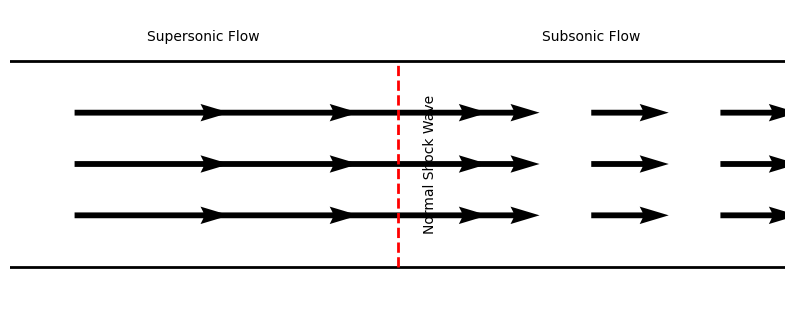

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4))

# Draw duct walls
ax.plot([0, 6], [1, 1], 'k-', linewidth=2)  # Top wall
ax.plot([0, 6], [-1, -1], 'k-', linewidth=2)  # Bottom wall

# Draw normal shock wave
ax.plot([3, 3], [-1, 1], 'r--', linewidth=2)  # Red dashed line

# Airflow arrows before the shock (supersonic)
x_before = [0.5, 1.5, 2.5]
y_before = [-0.5, 0, 0.5]
X_before, Y_before = np.meshgrid(x_before, y_before)
U_before = np.ones_like(X_before)  # Velocity magnitude = 1
V_before = np.zeros_like(X_before)  # No vertical component
ax.quiver(X_before, Y_before, U_before, V_before, scale=5, color='black')

# Airflow arrows after the shock (subsonic)
x_after = [3.5, 4.5, 5.5]
X_after, Y_after = np.meshgrid(x_after, y_before)
U_after = 0.5 * np.ones_like(X_after)  # Velocity magnitude = 0.5
V_after = np.zeros_like(X_after)  # No vertical component
ax.quiver(X_after, Y_after, U_after, V_after, scale=5, color='black')

# Add labels
ax.text(1.5, 1.2, 'Supersonic Flow', ha='center')
ax.text(4.5, 1.2, 'Subsonic Flow', ha='center')
ax.text(3.2, 0, 'Normal Shock Wave', rotation=90, va='center')

# Set plot limits and remove axes
ax.set_xlim(0, 6)
ax.set_ylim(-1.5, 1.5)
ax.axis('off')

# Display the plot
plt.show()


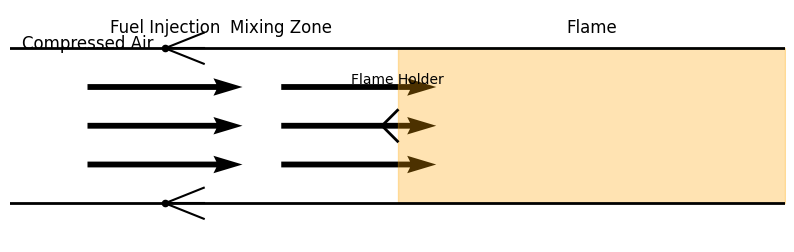

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Draw chamber walls
ax.plot([0, 10], [1, 1], 'k-', linewidth=2)  # Top wall
ax.plot([0, 10], [-1, -1], 'k-', linewidth=2)  # Bottom wall

# Compressed air arrows (at x=1)
y_arrow = np.array([-0.5, 0, 0.5])
ax.quiver([1]*3, y_arrow, [1]*3, [0]*3, scale=5, color='black')

# Mixing zone arrows (at x=3.5)
ax.quiver([3.5]*3, y_arrow, [1]*3, [0]*3, scale=5, color='black')

# Fuel injectors (at x=2)
ax.scatter([2, 2], [1, -1], color='black', s=20)  # Injector points
for y_start in [1, -1]:
    sign = 1 if y_start > 0 else -1
    # Spray lines: towards center, horizontal, and slightly outward
    ax.plot([2, 2.5], [y_start, y_start - 0.2*sign], 'k-')
    ax.plot([2, 2.5], [y_start, y_start], 'k-')
    ax.plot([2, 2.5], [y_start, y_start + 0.2*sign], 'k-')

# Flame holder (V-shape at x=5)
ax.plot([5, 4.8, 5], [0.2, 0, -0.2], 'k-', linewidth=2)

# Flame region (from x=5 to x=10)
ax.fill_between([5, 10], [-1, -1], [1, 1], color='orange', alpha=0.3)

# Add labels
ax.text(1, 1, 'Compressed Air', ha='center', fontsize=12)
ax.text(2, 1.2, 'Fuel Injection', ha='center', fontsize=12)
ax.text(3.5, 1.2, 'Mixing Zone', ha='center', fontsize=12)
ax.text(7.5, 1.2, 'Flame', ha='center', fontsize=12)
ax.text(5, 0.55, 'Flame Holder', ha='center', fontsize=10)

# Set limits and remove axes
ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.axis('off')

# Display the plot
plt.show()

In [ ]:
# Aerospace Propulsion Diagram Generator
# Developed for Google Colab (2024)

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.offsetbox import AnnotationBbox, TextArea
from matplotlib import rcParams

rcParams.update({'font.size': 10, 'font.family': 'sans-serif'})

class PropulsionVisualizer:
    def __init__(self):
        self.fig, self.ax = plt.subplots(figsize=(12, 8), dpi=150)
        self.ax.set_facecolor('#f0f0f0')
        self.components = {}

    def _setup_frame(self, title):
        try:
            self.ax.set_title(title, pad=20, fontsize=14, weight='bold')
            self.ax.set_aspect('equal')
            self.ax.grid(linestyle='--', alpha=0.5)
            self.ax.set_axis_off()
        except Exception as e:
            print(f"Plot setup error: {str(e)}")

    def _add_annotation(self, text, xy, offset=(0, 15)):
        try:
            ann = AnnotationBbox(TextArea(text, textprops=dict(backgroundcolor='w')),
                                xy, xybox=offset,
                                arrowprops=dict(arrowstyle="->"),
                                bbox=dict(fc="white"))
            self.ax.add_artist(ann)
        except Exception as e:
            print(f"Annotation error: {str(e)}")

    def draw_gas_turbine(self, parameters):
        """Draw gas turbine engine components with flow path"""
        try:
            # Core structure
            engine_body = Polygon([[0,0], [8,0], [8.5,1], [8,2], [0,2]],
                                closed=True, fc='#404040', ec='k', lw=1.5)
            self.ax.add_patch(engine_body)

            # Compressor section
            for x in np.linspace(1, 3, 6):
                self.ax.add_patch(Wedge((x,1), 0.8, 270, 90, fc='steelblue', ec='navy'))

            # Combustion chamber
            self.ax.add_patch(Circle((5,1), 0.7, fc='orange', alpha=0.3))
            self.ax.plot([4.3,5.7], [1,1], c='red', lw=3)

            # Turbine section
            for x in np.linspace(6, 7.5, 4):
                self.ax.add_patch(Wedge((x,1), 0.8, 90, 270, fc='maroon', ec='darkred'))

            # Flow arrows
            self.ax.annotate('', xy=(8.5,1), xytext=(0,1),
                           arrowprops=dict(arrowstyle='->', lw=2, color='dodgerblue'))

            # Mathematical annotations
            self._add_annotation(r'$\dot{m} = \sqrt{\frac{\gamma}{R} \cdot \frac{P_0 A^*}{\sqrt{T_0}}}$',
                                (5, 0.5))
        except Exception as e:
            print(f"Drawing error: {str(e)}")

    def save_output(self, filename='propulsion_diagram'):
        try:
            plt.tight_layout()
            plt.savefig(f'{filename}.png', dpi=300, bbox_inches='tight')
            print(f"Diagram saved as {filename}.png in Colab storage")
            plt.show()
        except Exception as e:
            print(f"Saving error: {str(e)}")

def create_diagram(diagram_type='gas_turbine', params=None):
    visualizer = PropulsionVisualizer()
    visualizer._setup_frame("Aerospace Propulsion System - "+diagram_type.replace('_',' ').title())

    if diagram_type == 'gas_turbine':
        visualizer.draw_gas_turbine(params or {})
    else:
        raise ValueError("Unsupported diagram type")

    visualizer.save_output()
    return visualizer

# Example usage:
# create_diagram('gas_turbine')

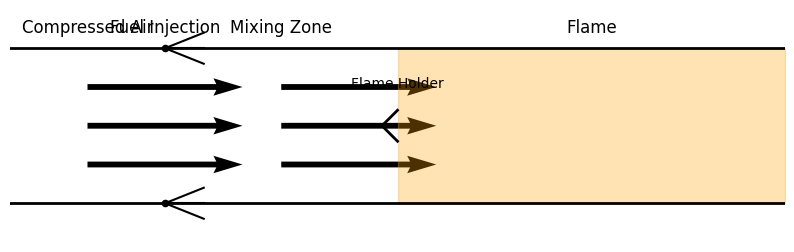

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Draw chamber walls
ax.plot([0, 10], [1, 1], 'k-', linewidth=2)  # Top wall
ax.plot([0, 10], [-1, -1], 'k-', linewidth=2)  # Bottom wall

# Compressed air arrows (at x=1)
y_arrow = np.array([-0.5, 0, 0.5])
ax.quiver([1]*3, y_arrow, [1]*3, [0]*3, scale=5, color='black')

# Mixing zone arrows (at x=3.5)
ax.quiver([3.5]*3, y_arrow, [1]*3, [0]*3, scale=5, color='black')

# Fuel injectors (at x=2)
ax.scatter([2, 2], [1, -1], color='black', s=20)  # Injector points
for y_start in [1, -1]:
    sign = 1 if y_start > 0 else -1
    # Spray lines: towards center, horizontal, and slightly outward
    ax.plot([2, 2.5], [y_start, y_start - 0.2*sign], 'k-')
    ax.plot([2, 2.5], [y_start, y_start], 'k-')
    ax.plot([2, 2.5], [y_start, y_start + 0.2*sign], 'k-')

# Flame holder (V-shape at x=5)
ax.plot([5, 4.8, 5], [0.2, 0, -0.2], 'k-', linewidth=2)

# Flame region (from x=5 to x=10)
ax.fill_between([5, 10], [-1, -1], [1, 1], color='orange', alpha=0.3)

# Add labels
ax.text(1, 1.2, 'Compressed Air', ha='center', fontsize=12)
ax.text(2, 1.2, 'Fuel Injection', ha='center', fontsize=12)
ax.text(3.5, 1.2, 'Mixing Zone', ha='center', fontsize=12)
ax.text(7.5, 1.2, 'Flame', ha='center', fontsize=12)
ax.text(5, 0.5, 'Flame Holder', ha='center', fontsize=10)

# Set limits and remove axes
ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.axis('off')

# Display the plot
plt.show()

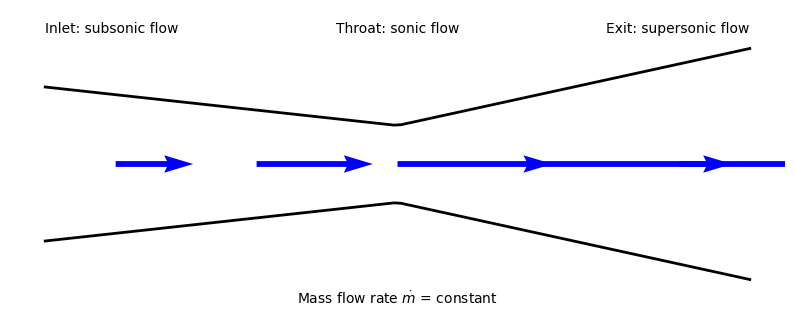

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with a wide aspect ratio
fig, ax = plt.subplots(figsize=(10, 4))

# Define nozzle shape
x = np.linspace(0, 10, 100)  # Axial length from 0 to 10 units
r = np.where(x <= 5, 2 - (1/5) * x, 1 + (2/5) * (x - 5))  # Radius function
# Convergent: r decreases from 2 to 1; Divergent: r increases from 1 to 3

# Plot nozzle boundaries
ax.plot(x, r, 'k-', linewidth=2, label='Nozzle wall')  # Top curve
ax.plot(x, -r, 'k-', linewidth=2)  # Bottom curve (symmetric)

# Add arrows to show flow acceleration
x_arrow = np.array([1, 3, 5, 7, 9])  # Positions along the centerline
y_arrow = np.zeros_like(x_arrow)  # Along y=0
u_arrow = np.array([0.5, 0.75, 1, 1.25, 1.5])  # Increasing lengths for velocity
v_arrow = np.zeros_like(u_arrow)  # No vertical component
ax.quiver(x_arrow, y_arrow, u_arrow, v_arrow, scale=5, color='blue', label='Flow direction')

# Add annotations
ax.text(0, 3.5, 'Inlet: subsonic flow', ha='left', va='center', fontsize=10)
ax.text(5, 3.5, 'Throat: sonic flow', ha='center', va='center', fontsize=10)
ax.text(10, 3.5, 'Exit: supersonic flow', ha='right', va='center', fontsize=10)
ax.text(5, -3.5, r'Mass flow rate $\dot{m}$ = constant', ha='center', va='center', fontsize=10)

# Set plot limits and remove axes for a schematic look
ax.set_ylim(-4, 4)
ax.axis('off')  # No axes for a clean diagram

# Display the plot
plt.show()

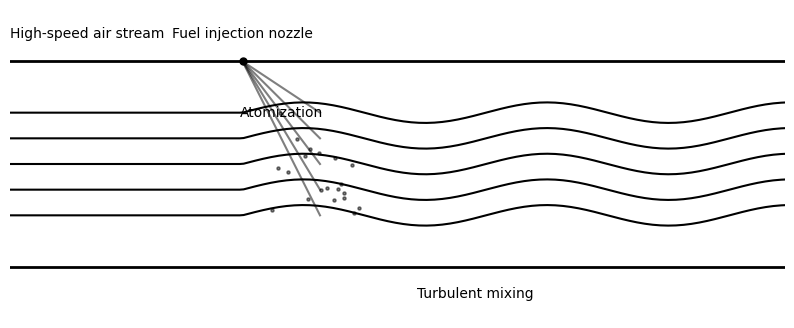

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with a wide aspect ratio for the horizontal flow
fig, ax = plt.subplots(figsize=(10, 4))

# Draw chamber walls
ax.plot([0, 10], [1, 1], 'k-', linewidth=2, label='Chamber walls')
ax.plot([0, 10], [-1, -1], 'k-', linewidth=2)

# Draw fuel injection nozzle
ax.plot(3, 1, 'ko', markersize=5, label='Fuel injection nozzle')

# Draw fuel spray lines to show dispersion
for y_target in np.linspace(-0.5, 0.5, 5):
    ax.plot([3, 4], [1, y_target], 'k-', alpha=0.5)

# Draw atomized droplets
x_scatter = np.random.uniform(3.2, 4.5, 20)
y_scatter = np.random.uniform(-0.5, 0.5, 20)
ax.scatter(x_scatter, y_scatter, s=5, color='k', alpha=0.5, label='Atomized droplets')

# Draw air streamlines: straight before injection, wavy after
x = np.linspace(0, 10, 200)
for y0 in [-0.5, -0.25, 0, 0.25, 0.5]:
    y = np.where(x < 3, y0, y0 + 0.1 * np.sin(2 * (x - 3)))
    ax.plot(x, y, 'k-', label='Air stream' if y0 == 0 else None)

# Add labels for clarity
ax.text(1, 1.2, 'High-speed air stream', ha='center', va='bottom')
ax.text(3, 1.2, 'Fuel injection nozzle', ha='center', va='bottom')
ax.text(3.5, 0.5, 'Atomization', ha='center', va='center')
ax.text(6, -1.2, 'Turbulent mixing', ha='center', va='top')

# Set plot limits and remove axes for a schematic look
ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 1.5)
ax.axis('off')

# Display the plot
plt.show()

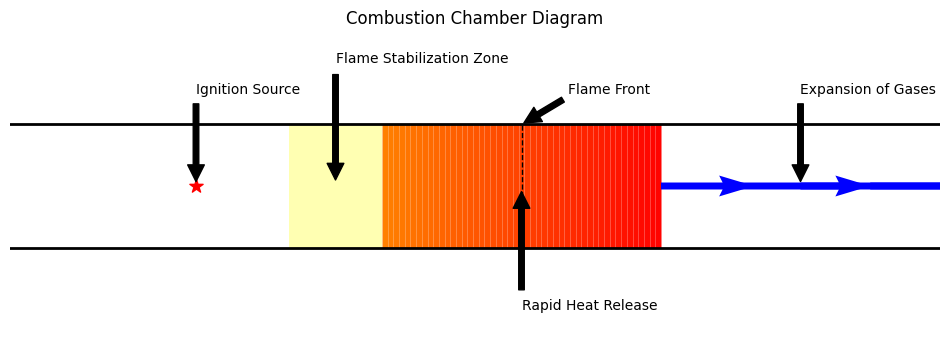

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 4))

# Chamber walls
ax.plot([0, 10], [1, 1], 'k-', linewidth=2)
ax.plot([0, 10], [-1, -1], 'k-', linewidth=2)

# Ignition source
ax.scatter(2, 0, marker='*', s=100, color='red')

# Flame stabilization zone
stab_zone = Rectangle((3, -1), 1, 2, facecolor='yellow', alpha=0.3)
ax.add_patch(stab_zone)

# Heat release gradient function
def gradient_fill(x_start, x_end, y_bottom, y_top, color_start, color_end, num_steps=50):
    patches = []
    x = np.linspace(x_start, x_end, num_steps)
    for i in range(num_steps - 1):
        color = [c_start + (c_end - c_start) * (i / (num_steps - 1)) for c_start, c_end in zip(color_start, color_end)]
        rect = Rectangle((x[i], y_bottom), x[i+1] - x[i], y_top - y_bottom, facecolor=color, edgecolor='none')
        patches.append(rect)
    return PatchCollection(patches, match_original=True)

# Apply gradient for heat release
heat_release = gradient_fill(4, 7, -1, 1, [1, 0.5, 0], [1, 0, 0], num_steps=50)
ax.add_collection(heat_release)

# Flame front
ax.plot([5.5, 5.5], [-1, 1], 'k--', linewidth=1)

# Gas expansion
x = np.linspace(7, 10, 5)
y = np.zeros_like(x)
u = np.linspace(0.5, 1.5, 5)
v = np.zeros_like(x)
ax.quiver(x, y, u, v, scale=5, color='blue')

# Annotations
ax.annotate('Ignition Source', xy=(2, 0), xytext=(2, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Flame Stabilization Zone', xy=(3.5, 0), xytext=(3.5, 2),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Rapid Heat Release', xy=(5.5, 0), xytext=(5.5, -2),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Flame Front', xy=(5.5, 1), xytext=(6, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Expansion of Gases', xy=(8.5, 0), xytext=(8.5, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Set limits and remove axes
ax.set_xlim(0, 10)
ax.set_ylim(-2.5, 2.5)
ax.axis('off')

# Title
ax.set_title('Combustion Chamber Diagram')

# Display the plot
plt.show()

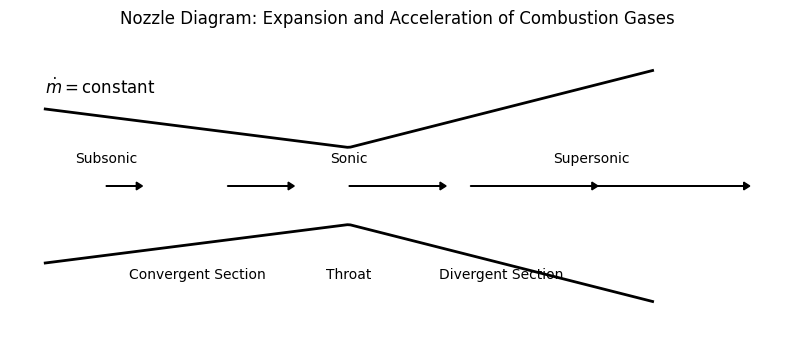

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Define the x-coordinates along the nozzle length
x = np.linspace(0, 10, 200)

# Define the y-coordinates for the nozzle walls
# Convergent section (x=0 to 5): y decreases from 1 to 0.5
# Divergent section (x=5 to 10): y increases from 0.5 to 1.5
y = np.where(x <= 5, 1 - 0.1 * x, 0.5 + 0.2 * (x - 5))

# Plot the top and bottom walls of the nozzle
ax.plot(x, y, 'k-', linewidth=2)    # Top wall
ax.plot(x, -y, 'k-', linewidth=2)   # Bottom wall

# Add arrows to represent gas flow and velocity increase
x_arrow = [1, 3, 5, 7, 9]           # Positions along the centerline
lengths = [0.5, 1, 1.5, 2, 2.5]    # Arrow lengths increase to show acceleration
for i in range(5):
    ax.arrow(x_arrow[i], 0, lengths[i], 0, head_width=0.1, head_length=0.1, fc='k', ec='k')

# Add annotations for velocity
ax.text(1, 0.3, 'Subsonic', ha='center', fontsize=10)
ax.text(5, 0.3, 'Sonic', ha='center', fontsize=10)
ax.text(9, 0.3, 'Supersonic', ha='center', fontsize=10)

# Add annotation for mass flow rate (constant throughout)
ax.text(0, 1.2, r'$\dot{m} = \text{constant}$', ha='left', fontsize=12)

# Add labels for nozzle sections
ax.text(2.5, -1.2, 'Convergent Section', ha='center', fontsize=10)
ax.text(5, -1.2, 'Throat', ha='center', fontsize=10)
ax.text(7.5, -1.2, 'Divergent Section', ha='center', fontsize=10)

# Set plot limits to ensure all elements are visible
ax.set_ylim(-2, 2)

# Add a title
ax.set_title('Nozzle Diagram: Expansion and Acceleration of Combustion Gases', fontsize=12)

# Remove axes for a clean schematic look
ax.axis('off')

# Display the plot
plt.show()

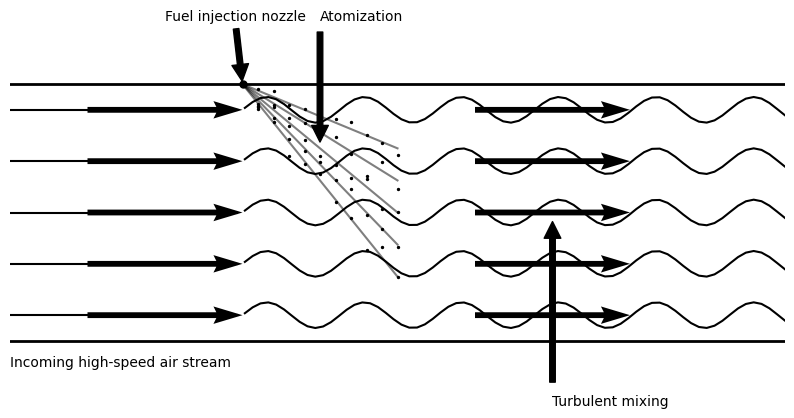

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Define x values for plotting
x = np.linspace(0, 10, 100)

# Plot chamber walls (top and bottom of the duct)
ax.plot([0, 10], [1, 1], 'k-', linewidth=2)  # Top wall
ax.plot([0, 10], [-1, -1], 'k-', linewidth=2)  # Bottom wall

# Plot fuel injection nozzle (a small circle on the top wall)
ax.plot(3, 1, 'ko', markersize=5)  # Nozzle at x=3, y=1

# Define end points for fuel spray lines (fan-shaped dispersion)
y_ends = [0.5, 0.25, 0, -0.25, -0.5]
for y_end in y_ends:
    ax.plot([3, 5], [1, y_end], 'k-', alpha=0.5)  # Fuel spray lines from nozzle

# Plot atomized fuel droplets (small scattered points)
for y_end in y_ends:
    x_points = np.linspace(3.2, 5, 10)  # x-range for droplets
    # Linear interpolation with random noise for droplet spread
    y_points = 1 + (y_end - 1)/(5-3)*(x_points-3) + np.random.normal(0, 0.05, 10)
    ax.scatter(x_points, y_points, s=2, color='k')  # Droplets as tiny dots

# Define y positions for air streamlines
y0s = [-0.8, -0.4, 0, 0.4, 0.8]
idx = np.where(x >= 3)[0][0]  # Index where x >= 3 (injection point)
for y0 in y0s:
    # Straight part of streamline (before injection)
    ax.plot(x[:idx], y0 * np.ones(idx), 'k-')
    # Wavy part of streamline (after injection, indicating turbulence)
    ax.plot(x[idx:], y0 + 0.1 * np.sin(5 * (x[idx:] - 3)), 'k-')

# Add arrows to indicate flow direction along streamlines
for y0 in y0s:
    ax.quiver([1, 6], [y0, y0], [1, 1], [0, 0], scale=5, color='k')

# Add annotations with arrows pointing to key features
ax.annotate('Fuel injection nozzle', xy=(3, 1), xytext=(2, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Atomization', xy=(4, 0.5), xytext=(4, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Turbulent mixing', xy=(7, 0), xytext=(7, -1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.text(0, -1.2, 'Incoming high-speed air stream', ha='left')

# Set plot limits and remove axes for a clean schematic look
ax.set_xlim(0, 10)
ax.set_ylim(-1.2, 1.2)
ax.axis('off')

# Display the plot
plt.show()

Generation error: 'CombustionChamberVisualizer' object has no attribute '_draw_ignitation_sources'


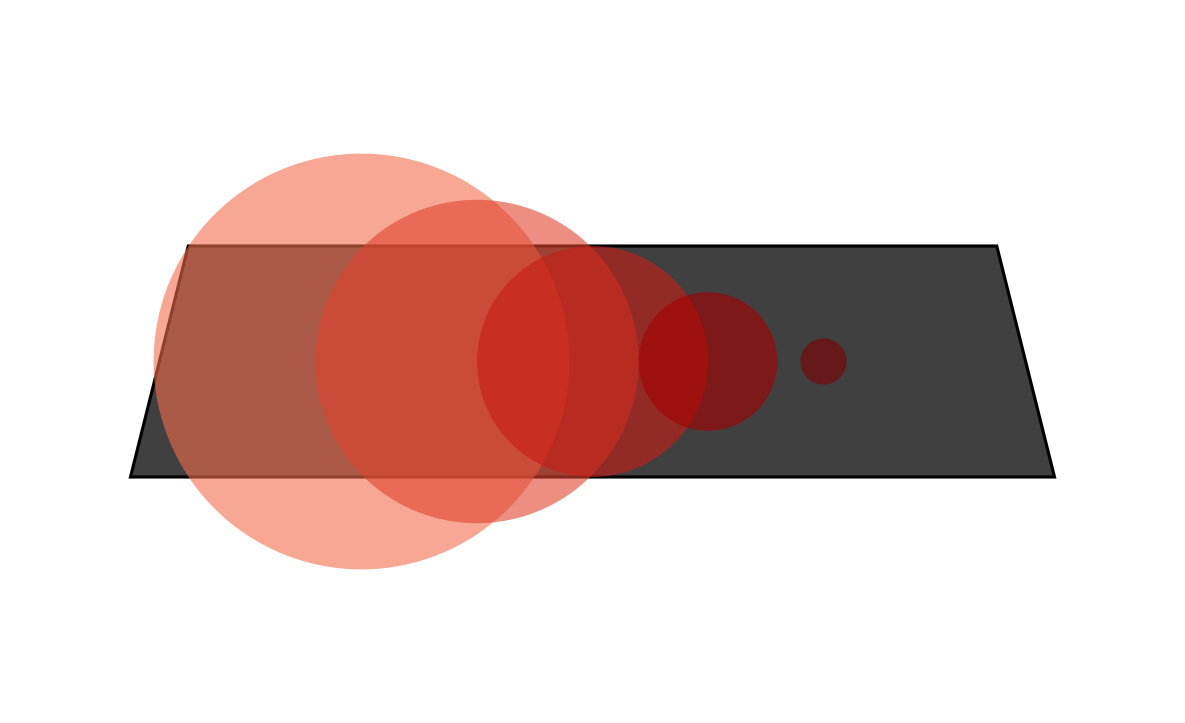

In [ ]:
# Combustion Chamber Visualizer
# Google Colab Compatible

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Polygon, FancyArrow
from matplotlib.collections import PatchCollection

class CombustionChamberVisualizer:
    def __init__(self):
        self.fig, self.ax = plt.subplots(figsize=(10, 6), dpi=150)
        self.ax.set_facecolor('#f0f0f0')
        self._setup_axes()

    def _setup_axes(self):
        self.ax.set_xlim(0, 10)
        self.ax.set_ylim(0, 6)
        self.ax.set_aspect('equal')
        self.ax.axis('off')
        self.ax.grid(False)

    def _draw_chamber_walls(self):
        # Chamber geometry with liner and casing
        chamber = Polygon([[1,2], [9,2], [8.5,4], [1.5,4]],
                         closed=True, fc='#404040', ec='k', lw=1.5)
        self.ax.add_patch(chamber)

    def _draw_flame_zones(self):
        # Flame stabilization region with turbulence
        for x in np.linspace(3, 7, 5):
            flame = Circle((x, 3), radius=0.4*(7-x)+0.2,
                          fc=plt.cm.OrRd(0.3 + 0.1*x), alpha=0.6)
            self.ax.add_patch(flame)

    def _draw_ignition_sources(self):
        # Spark plugs/igniters
        for x in [2.8, 5, 7.2]:
            self.ax.add_patch(Polygon([[x-0.1,1.8], [x+0.1,1.8],
                                     [x,2.2]], fc='red', ec='gold'))
            self.ax.text(x, 2.4, 'Ignition\nSource', ha='center',
                        va='bottom', backgroundcolor='white')

    def _draw_gas_expansion(self):
        # Expansion flow arrows
        for angle in np.linspace(-30, 30, 7):
            arrow = FancyArrow(8.5, 3, 1.5*np.cos(np.radians(angle)),
                             1.5*np.sin(np.radians(angle)),
                             width=0.15, fc='dodgerblue', ec='navy')
            self.ax.add_patch(arrow)

    def _add_annotations(self):
        # Rayleigh Criterion annotation
        self.ax.text(4, 4.5, r'Rayleigh Criterion: $\int \frac{\delta q}{T} > 0$',
                   fontsize=12, backgroundcolor='white',
                   bbox=dict(facecolor='white', edgecolor='black'))

        # Flame zones label
        self.ax.annotate('Flame Stabilization Zone\n(Recirculation Vortex)',
                        xy=(5, 3), xytext=(3, 4.8),
                        arrowprops=dict(arrowstyle='->', lw=1.5),
                        backgroundcolor='white')

    def generate_diagram(self):
        try:
            self._draw_chamber_walls()
            self._draw_flame_zones()
            self._draw_ignitation_sources()
            self._draw_gas_expansion()
            self._add_annotations()

            plt.title('Combustion Chamber Process Diagram\n', fontsize=14, pad=20)
            plt.savefig('combustion_chamber.png', dpi=300, bbox_inches='tight')
            plt.show()

        except Exception as e:
            print(f"Generation error: {e}")

# Generate the diagram
visualizer = CombustionChamberVisualizer()
visualizer.generate_diagram()

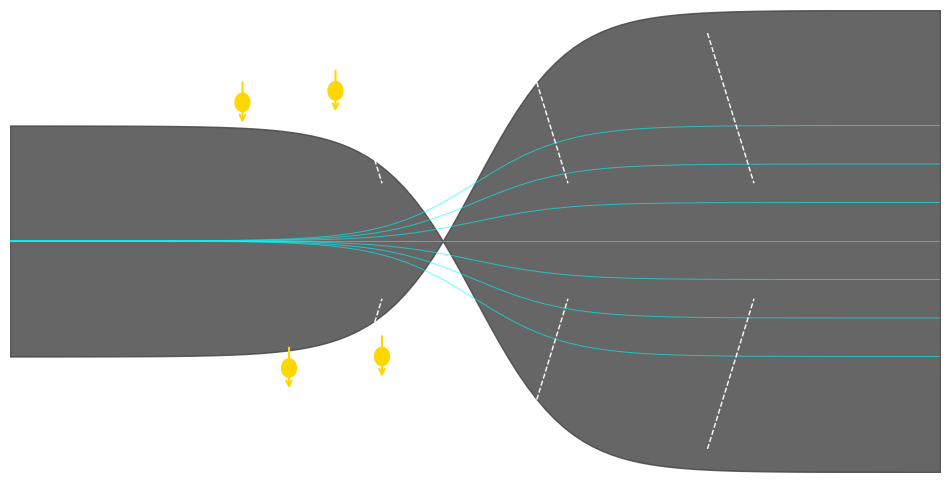

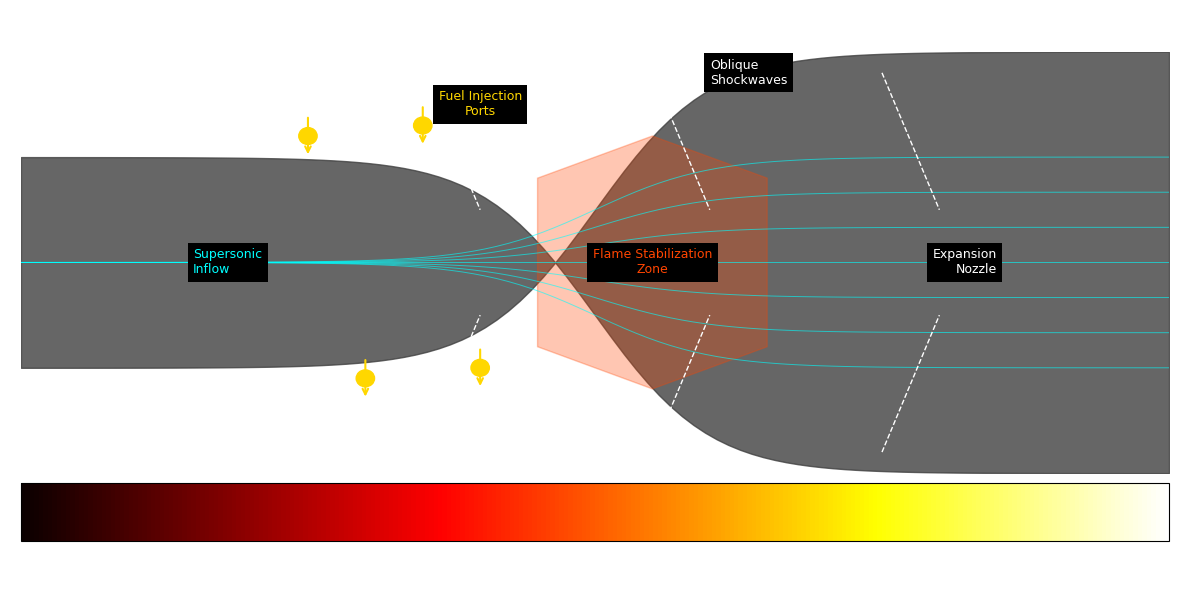

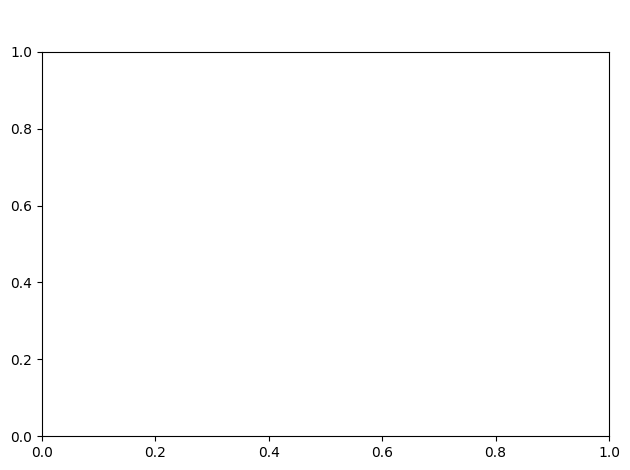

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch

# Set up figure
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('black')
ax.set_xlim(0, 10)
ax.set_ylim(-2, 2)
ax.axis('off')

# Combustion chamber walls
x = np.linspace(0, 10, 100)
upper_wall = 1.5 * np.tanh(x-5) + 0.5
lower_wall = -upper_wall
ax.fill_between(x, upper_wall, lower_wall, color='#404040', alpha=0.8)

# Supersonic flow lines
for y in np.linspace(-1, 1, 7):
    ax.plot(x, y * (0.5 + 0.5*np.tanh(x-5)), color='cyan', lw=0.7, alpha=0.6)

# Shockwave patterns
shock_x = [3.5, 5.5, 7.5]
for sx in shock_x:
    ax.plot([sx, sx+0.5], [1.8, 0.5], color='white', ls='--', lw=1)
    ax.plot([sx, sx+0.5], [-1.8, -0.5], color='white', ls='--', lw=1)

# Fuel injection ports
injectors = [(2.5, 1.2), (3.0, -1.1), (3.5, 1.3), (4.0, -1.0)]
for x, y in injectors:
    ax.add_patch(plt.Circle((x, y), 0.08, color='#FFD700'))
    ax.annotate('', xy=(x, y-0.2), xytext=(x, y+0.2),
                arrowprops=dict(arrowstyle='->', color='#FFD700', lw=1.5))
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch

# Set up figure
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('black')
ax.set_xlim(0, 10)
ax.set_ylim(-2, 2)
ax.axis('off')

# Combustion chamber walls
x = np.linspace(0, 10, 100)
upper_wall = 1.5 * np.tanh(x-5) + 0.5
lower_wall = -upper_wall
ax.fill_between(x, upper_wall, lower_wall, color='#404040', alpha=0.8)

# Supersonic flow lines
for y in np.linspace(-1, 1, 7):
    ax.plot(x, y * (0.5 + 0.5*np.tanh(x-5)), color='cyan', lw=0.7, alpha=0.6)

# Shockwave patterns
shock_x = [3.5, 5.5, 7.5]
for sx in shock_x:
    ax.plot([sx, sx+0.5], [1.8, 0.5], color='white', ls='--', lw=1)
    ax.plot([sx, sx+0.5], [-1.8, -0.5], color='white', ls='--', lw=1)

# Fuel injection ports
injectors = [(2.5, 1.2), (3.0, -1.1), (3.5, 1.3), (4.0, -1.0)]
for x, y in injectors:
    ax.add_patch(plt.Circle((x, y), 0.08, color='#FFD700'))
    ax.annotate('', xy=(x, y-0.2), xytext=(x, y+0.2),
                arrowprops=dict(arrowstyle='->', color='#FFD700', lw=1.5))

# Flame stabilization zone
flame_zone = plt.Polygon([[4.5, -0.8], [5.5, -1.2], [6.5, -0.8],
                        [6.5, 0.8], [5.5, 1.2], [4.5, 0.8]],
                       closed=True, color='#FF4500', alpha=0.3)
ax.add_patch(flame_zone)

# Annotations
annotations = [
    (1.5, 0, 'Supersonic\nInflow', 'cyan', 'left'),
    (8.5, 0, 'Expansion\nNozzle', 'white', 'right'),
    (4.0, 1.5, 'Fuel Injection\nPorts', '#FFD700', 'center'),
    (5.5, 0, 'Flame Stabilization\nZone', '#FF4500', 'center'),
    (6.0, 1.8, 'Oblique\nShockwaves', 'white', 'left')
]

for x, y, text, color, align in annotations:
    ax.text(x, y, text, color=color, ha=align, va='center',
           fontsize=9, bbox=dict(facecolor='black', edgecolor='none'))

# Add colorbar for reference
sm = plt.cm.ScalarMappable(cmap='hot')
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02)
cbar.set_label('Temperature Gradient', color='white')
cbar.ax.xaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'xticklabels'), color='white')

plt.title('Scramjet Combustion Chamber - Supersonic Flow Characteristics',
        color='white', pad=20)
plt.tight_layout()
plt.savefig('scramjet_diagram.png', dpi=300, facecolor='black')
plt.show()
ax.add_patch(flame_zone)

# Annotations
annotations = [
    (1.5, 0, 'Supersonic\nInflow', 'cyan', 'left'),
    (8.5, 0, 'Expansion\nNozzle', 'white', 'right'),
    (4.0, 1.5, 'Fuel Injection\nPorts', '#FFD700', 'center'),
    (5.5, 0, 'Flame Stabilization\nZone', '#FF4500', 'center'),
    (6.0, 1.8, 'Oblique\nShockwaves', 'white', 'left')
]

for x, y, text, color, align in annotations:
    ax.text(x, y, text, color=color, ha=align, va='center',
           fontsize=9, bbox=dict(facecolor='black', edgecolor='none'))

# Add colorbar for reference
sm = plt.cm.ScalarMappable(cmap='hot')
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02)
cbar.set_label('Temperature Gradient', color='white')
cbar.ax.xaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'xticklabels'), color='white')

plt.title('Scramjet Combustion Chamber - Supersonic Flow Characteristics',
        color='white', pad=20)
plt.tight_layout()
plt.savefig('scramjet_diagram.png', dpi=300, facecolor='black')
plt.show()

Annotation error: AnnotationBbox.set() got an unexpected keyword argument 'bbox'
Annotation error: AnnotationBbox.set() got an unexpected keyword argument 'bbox'
Annotation error: AnnotationBbox.set() got an unexpected keyword argument 'bbox'
Drawing error: name 'Rectangle' is not defined
Diagram saved as hypersonic_vehicle.png in Colab storage


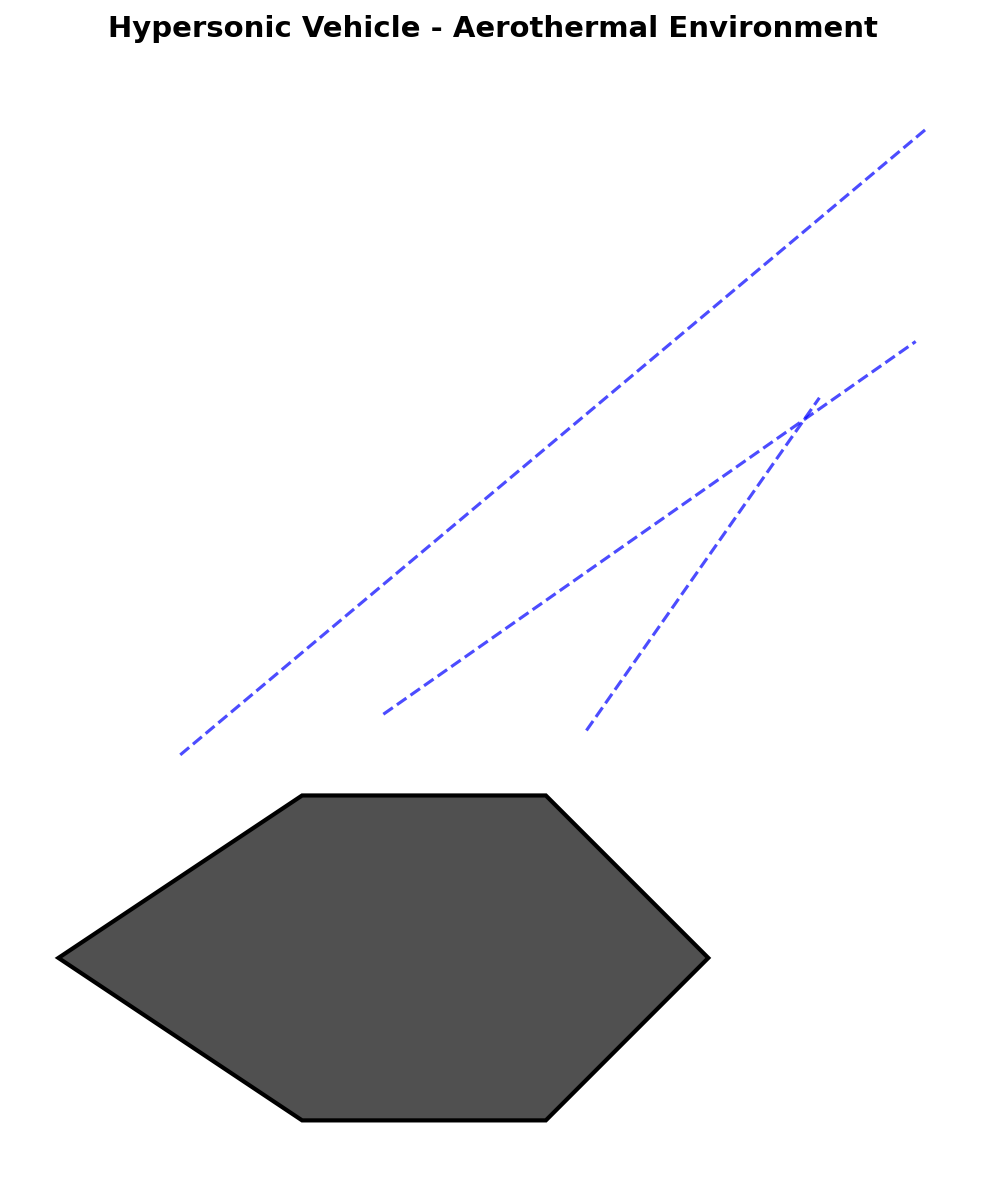

In [ ]:
# Hypersonic Vehicle Aerothermal Visualizer
class HypersonicVehicleVisualizer(PropulsionVisualizer):
    def draw_hypersonic_vehicle(self):
        """Advanced hypersonic vehicle schematic with aerothermal features"""
        try:
            # Vehicle geometry (wave rider configuration)
            vehicle = Polygon([[2,0], [5,2], [8,2], [10,0], [8,-2], [5,-2], [2,0]],
                            closed=True, fc='#505050', ec='k', lw=2)
            self.ax.add_patch(vehicle)

            # Shockwave system
            shock_properties = [
                (3.5, 2.5, 12, 40, 'Bow Shock\n(M=8)'),
                (6.0, 3.0, 8, 35, 'Oblique Shock\n(M=6.5)'),
                (8.5, 2.8, 5, 55, 'Expansion Wave\n(M=7.2)')
            ]

            for x, y, length, angle, label in shock_properties:
                dx = length * np.cos(np.radians(angle))
                dy = length * np.sin(np.radians(angle))
                self.ax.plot([x, x+dx], [y, y+dy], 'b--', lw=1.5, alpha=0.7)
                self._add_annotation(label, (x+dx/2, y+dy/2),
                                   (15*np.sign(dx), 15*np.sign(dy)))

            # Thermal Protection System (TPS)
            tps_zones = [
                (5, 2, 1.5, 0.4, 'C/SiC\nLeading Edge', 45),
                (7, 1.5, 1.2, 0.3, 'HfB2 Coating', 0),
                (3, 1, 1.0, 0.25, 'TUFROC\nNose Cap', -30)
            ]

            for x, y, w, h, label, angle in tps_zones:
                self.ax.add_patch(Rectangle((x-w/2, y-h/2), w, h,
                                          angle=angle, fc='orange', alpha=0.3))
                self._add_annotation(label, (x, y), (0, 15))

            # Flow patterns using streamlines
            x, y = np.meshgrid(np.linspace(0, 12, 15), np.linspace(-4, 4, 10))
            u = 10*(1 - 0.2*y**2)
            v = 0.5*np.sin(0.8*x)
            self.ax.streamplot(x, y, u, v, color='dodgerblue', density=1.5,
                             linewidth=1, arrowsize=1.5)

            # Aerothermal annotations
            self._add_annotation(r'$q_w = \frac{1}{2}\rho_\infty v_\infty^3 C_h$',
                               (9, 3), (-120, 20))
            self._add_annotation(r'$\frac{\partial T}{\partial y}\Big|_{wall} > 1000\ K/cm$',
                               (4, -1.5), (0, -30))

            # Configure view
            self.ax.set_xlim(0, 12)
            self.ax.set_ylim(-4, 4)
            self.ax.legend([plt.Line2D([0], [0], color='b', linestyle='--'),
                          plt.Line2D([0], [0], color='orange', alpha=0.3)],
                         ['Shock Waves', 'TPS Zones'], loc='upper right')

        except Exception as e:
            print(f"Drawing error: {str(e)}")

def create_hypersonic_diagram():
    visualizer = HypersonicVehicleVisualizer()
    visualizer._setup_frame("Hypersonic Vehicle - Aerothermal Environment")
    visualizer.draw_hypersonic_vehicle()
    visualizer.save_output('hypersonic_vehicle')
    return visualizer

# Execute with:
create_hypersonic_diagram()

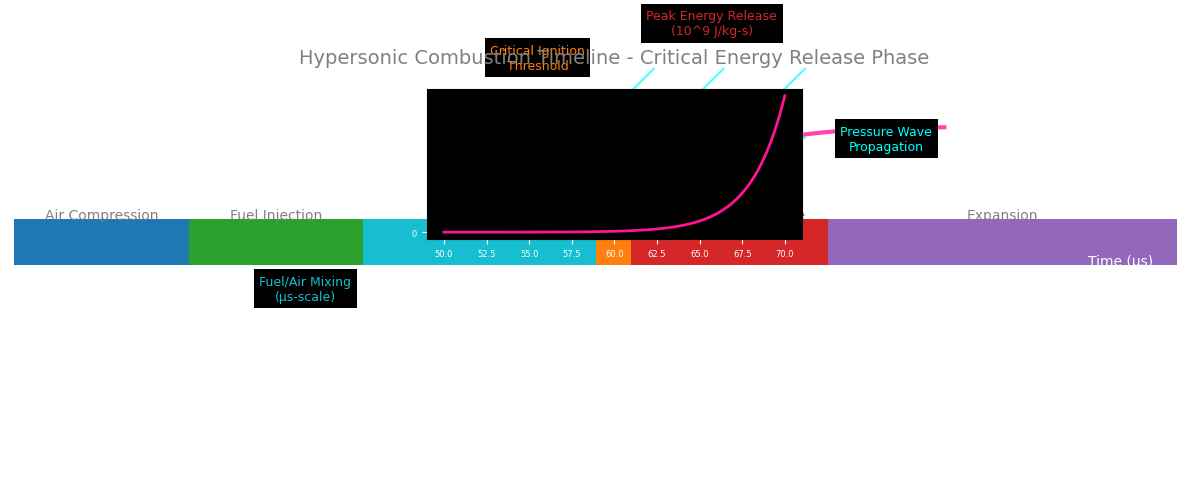

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch

# Create figure with dark background
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_facecolor('black')
ax.set_xlim(0, 100)
ax.set_ylim(-1, 3)
ax.axis('off')

# Timeline parameters
phases = [
    ("Air Compression", 0, 15, '#1f77b4'),
    ("Fuel Injection", 15, 30, '#2ca02c'),
    ("Mixing Phase", 30, 50, '#17becf'),
    ("Ignition", 50, 53, '#ff7f0e'),
    ("Rapid Energy Release", 53, 70, '#d62728'),
    ("Expansion", 70, 100, '#9467bd')
]

# Draw timeline phases
for label, start, end, color in phases:
    ax.barh(1, end-start, left=start, height=0.4, color=color)
    ax.text((start+end)/2, 1.2, label, ha='center', color='grey', fontsize=10)

# Add energy release curve
x = np.linspace(40, 80, 100)
y = np.exp((x-55)/5) / (1 + np.exp((x-55)/5)) + 1
ax.plot(x, y, color='#ff1493', lw=3, alpha=0.8)

# Add shockwave indicators
for x_pos in [52, 58, 65]:
    ax.plot([x_pos, x_pos+3], [2.2, 2.5], color='cyan', lw=1.5, alpha=0.7)
    ax.plot([x_pos, x_pos+3], [2.2, 1.9], color='cyan', lw=1.5, alpha=0.7)

# Annotations
annotations = [
    (45, 2.5, "Critical Ignition\nThreshold", '#ff7f0e'),
    (60, 2.8, "Peak Energy Release\n(10^9 J/kg-s)", '#d62728'),
    (75, 1.8, "Pressure Wave\nPropagation", 'cyan'),
    (25, 0.5, "Fuel/Air Mixing\n(μs-scale)", '#17becf')
]

for x, y, text, color in annotations:
    ax.text(x, y, text, color=color, ha='center', fontsize=9,
           bbox=dict(facecolor='black', edgecolor='none'))

# Add time scale
ax.text(98, 0.8, "Time (μs)", color='white', ha='right')
ax.plot([0, 100], [0.8, 0.8], color='white', lw=0.5)
for t in [0, 50, 100]:
    ax.text(t, 0.7, str(t), color='white', ha='center')

# Add energy release inset
ax_inset = fig.add_axes([0.4, 0.5, 0.25, 0.25], facecolor='black')
x_inset = np.linspace(50, 70, 100)
y_inset = np.exp((x_inset-60)/2)
ax_inset.plot(x_inset, y_inset, color='#ff1493', lw=2)
ax_inset.set_title("Energy Release Rate", color='white', fontsize=8)
ax_inset.tick_params(axis='both', colors='white', labelsize=6)

plt.title("Hypersonic Combustion Timeline - Critical Energy Release Phase",
         color='grey', fontsize=14, pad=19)
plt.savefig('hypersonic_combustion_timeline.png', dpi=300, facecolor='black')
plt.show()

<ipython-input-5-1224672aaa84>:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


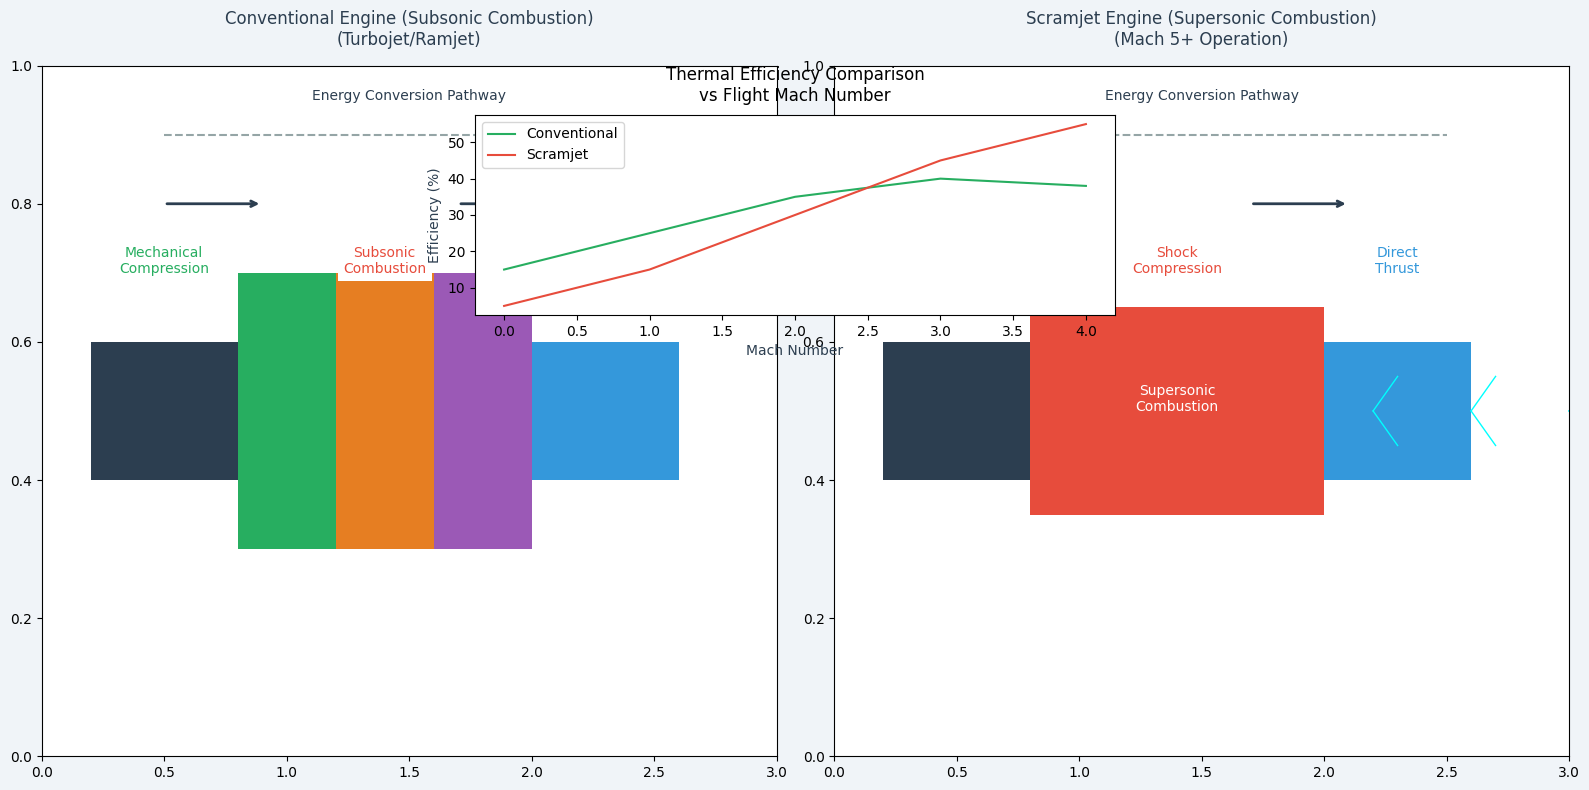

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle, Polygon, FancyArrow

# Set up figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.patch.set_facecolor('#f0f4f8')

def draw_engine(ax, supersonic=False):
    """Draw engine schematic with energy conversion annotations"""
    # Common components
    ax.add_patch(Rectangle((0.2, 0.4), 0.6, 0.2, facecolor='#2c3e50'))  # Inlet
    ax.add_patch(Rectangle((2.0, 0.4), 0.6, 0.2, facecolor='#3498db'))  # Nozzle

    if supersonic:  # Scramjet configuration
        ax.add_patch(Rectangle((0.8, 0.35), 1.2, 0.3, facecolor='#e74c3c'))  # Combustor
        ax.text(1.4, 0.5, 'Supersonic\nCombustion', ha='center', color='white')
        # Shock diamonds
        for x in np.linspace(2.2, 3.0, 3):
            ax.plot([x, x+0.1], [0.5, 0.55], color='cyan', lw=1)
            ax.plot([x, x+0.1], [0.5, 0.45], color='cyan', lw=1)
    else:  # Conventional configuration
        ax.add_patch(Rectangle((0.8, 0.3), 0.4, 0.4, facecolor='#27ae60'))  # Compressor
        ax.add_patch(Rectangle((1.2, 0.3), 0.4, 0.4, facecolor='#e67e22'))  # Combustor
        ax.add_patch(Rectangle((1.6, 0.3), 0.4, 0.4, facecolor='#9b59b6'))  # Turbine

    # Energy conversion arrows
    arrow_style = dict(arrowstyle='->', lw=2, color='#2c3e50')
    ax.annotate('', xy=(0.9, 0.8), xytext=(0.5, 0.8), arrowprops=arrow_style)
    ax.annotate('', xy=(2.1, 0.8), xytext=(1.7, 0.8), arrowprops=arrow_style)

    # Thermodynamic process labels
    processes = [
        (0.5, 0.7, 'Mechanical\nCompression', '#27ae60'),
        (1.4, 0.7, 'Subsonic\nCombustion' if not supersonic else 'Shock\nCompression', '#e74c3c'),
        (2.3, 0.7, 'Energy\nExtraction' if not supersonic else 'Direct\nThrust', '#3498db')
    ]
    for x, y, label, color in processes:
        ax.text(x, y, label, ha='center', color=color,
               bbox=dict(facecolor='white', edgecolor='none'))

# Draw conventional engine
ax1.set_xlim(0, 3)
ax1.set_ylim(0, 1)
draw_engine(ax1)
ax1.set_title('Conventional Engine (Subsonic Combustion)\n(Turbojet/Ramjet)',
            color='#2c3e50', pad=15)

# Draw scramjet engine
ax2.set_xlim(0, 3)
ax2.set_ylim(0, 1)
draw_engine(ax2, supersonic=True)
ax2.set_title('Scramjet Engine (Supersonic Combustion)\n(Mach 5+ Operation)',
            color='#2c3e50', pad=15)

# Add energy flow diagrams
for ax in (ax1, ax2):
    ax.plot([0.5, 2.5], [0.9, 0.9], color='#95a5a6', ls='--')
    ax.text(1.5, 0.95, 'Energy Conversion Pathway', ha='center', color='#2c3e50')

# Add efficiency comparison
eff_x = np.array([0, 1, 2, 3, 4])
eff_conv = np.array([15, 25, 35, 40, 38])
eff_scram = np.array([5, 15, 30, 45, 55])

ax_eff = fig.add_axes([0.3, 0.6, 0.4, 0.25], facecolor='white')
ax_eff.plot(eff_x, eff_conv, color='#27ae60', label='Conventional')
ax_eff.plot(eff_x, eff_scram, color='#e74c3c', label='Scramjet')
ax_eff.set_title('Thermal Efficiency Comparison\nvs Flight Mach Number', pad=10)
ax_eff.set_xlabel('Mach Number', color='#2c3e50')
ax_eff.set_ylabel('Efficiency (%)', color='#2c3e50')
ax_eff.legend()

plt.tight_layout()
plt.savefig('engine_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

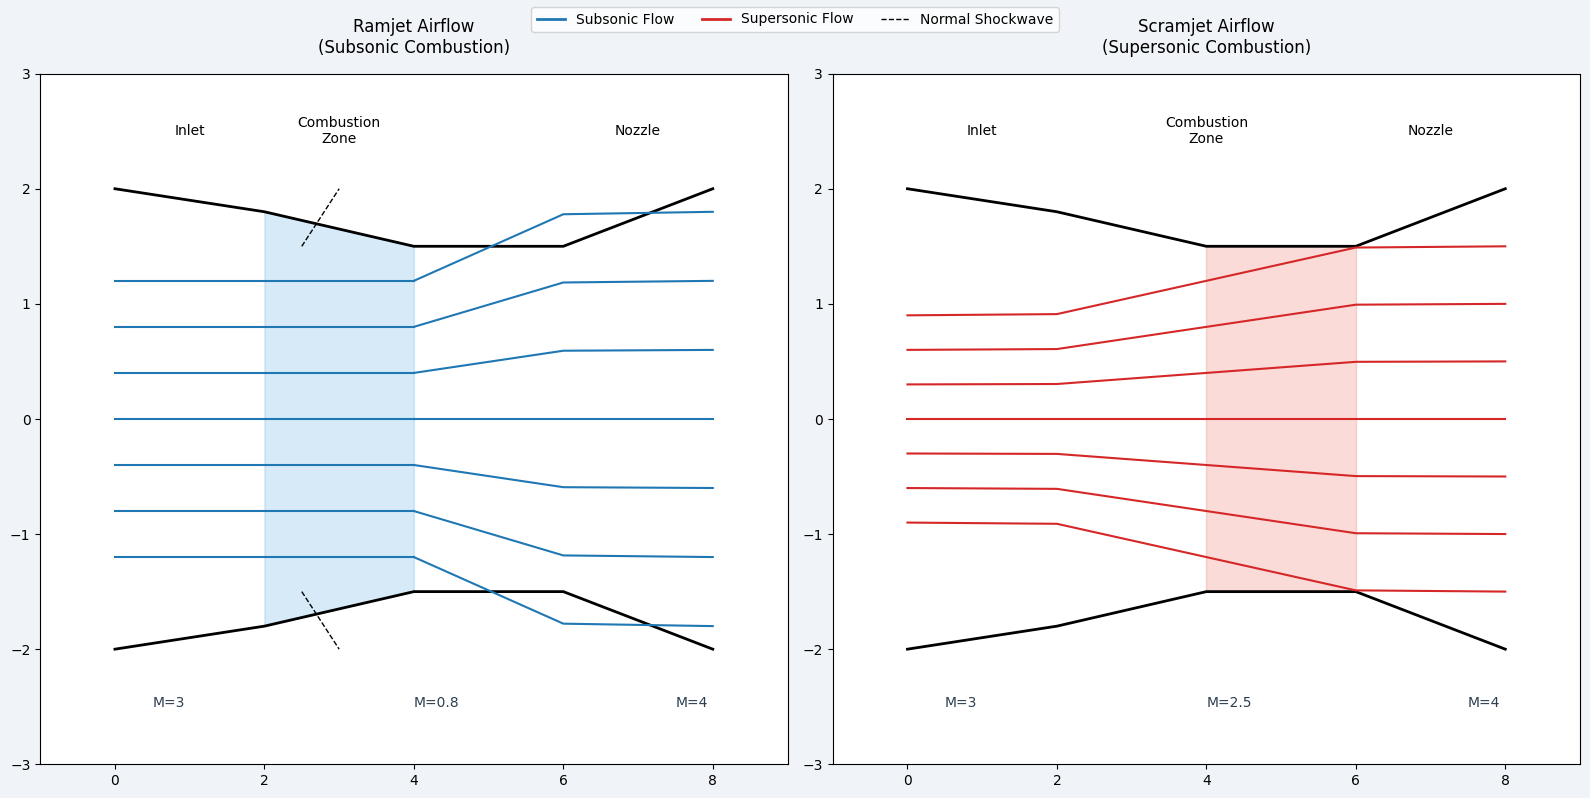

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon, FancyArrow

# Set up figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.patch.set_facecolor('#f0f4f8')

def draw_engine(ax, scramjet=False):
    """Draw engine diagram with airflow paths"""
    # Engine structure
    x = np.array([0, 2, 4, 6, 8])
    y_upper = np.array([2, 1.8, 1.5, 1.5, 2])
    y_lower = -y_upper

    # Combustion chamber highlighting
    if scramjet:
        ax.fill_between(x[2:4], y_upper[2:4], y_lower[2:4], color='#e74c3c', alpha=0.2)
    else:
        ax.fill_between(x[1:3], y_upper[1:3], y_lower[1:3], color='#3498db', alpha=0.2)

    # Engine walls
    ax.plot(x, y_upper, 'k-', lw=2)
    ax.plot(x, y_lower, 'k-', lw=2)

    # Flow lines
    for y in np.linspace(-1.5, 1.5, 7):
        if scramjet:
            ax.plot(x, y * (0.8 + 0.2*np.tanh((x-4)/1)), color='#d62728', lw=1.5)
        else:
            ax.plot(x[:3], y * 0.8 * np.ones(3), color='#1f77b4', lw=1.5)
            ax.plot(x[2:], y * 0.8 * (1 + 0.5*np.tanh((x[2:]-4)/1)), color='#1f77b4', lw=1.5)

    # Shock waves
    if not scramjet:
        ax.plot([2.5, 3], [1.5, 2], 'k--', lw=1)
        ax.plot([2.5, 3], [-1.5, -2], 'k--', lw=1)

    # Annotations
    styles = {'ha': 'center', 'va': 'center', 'fontsize': 10}
    ax.text(1, 2.5, 'Inlet', **styles)
    ax.text(4 if scramjet else 3, 2.5, 'Combustion\nZone', **styles)
    ax.text(7, 2.5, 'Nozzle', **styles)

    # Mach numbers
    ax.text(0.5, -2.5, 'M=3', color='#2c3e50')
    ax.text(4, -2.5, 'M=0.8' if not scramjet else 'M=2.5', color='#2c3e50')
    ax.text(7.5, -2.5, 'M=4', color='#2c3e50')

# Ramjet diagram
ax1.set_xlim(-1, 9)
ax1.set_ylim(-3, 3)
draw_engine(ax1)
ax1.set_title('Ramjet Airflow\n(Subsonic Combustion)', fontsize=12, pad=15)

# Scramjet diagram
ax2.set_xlim(-1, 9)
ax2.set_ylim(-3, 3)
draw_engine(ax2, scramjet=True)
ax2.set_title('Scramjet Airflow\n(Supersonic Combustion)', fontsize=12, pad=15)

# Legend
fig.legend([plt.Line2D([0], [0], color='#1f77b4', lw=2),
            plt.Line2D([0], [0], color='#d62728', lw=2),
            plt.Line2D([0], [0], color='k', ls='--', lw=1)],
           ['Subsonic Flow', 'Supersonic Flow', 'Normal Shockwave'],
           loc='upper center', ncol=3, fontsize=10)

plt.tight_layout()
plt.savefig('ramjet_vs_scramjet.png', dpi=300, bbox_inches='tight')
plt.show()

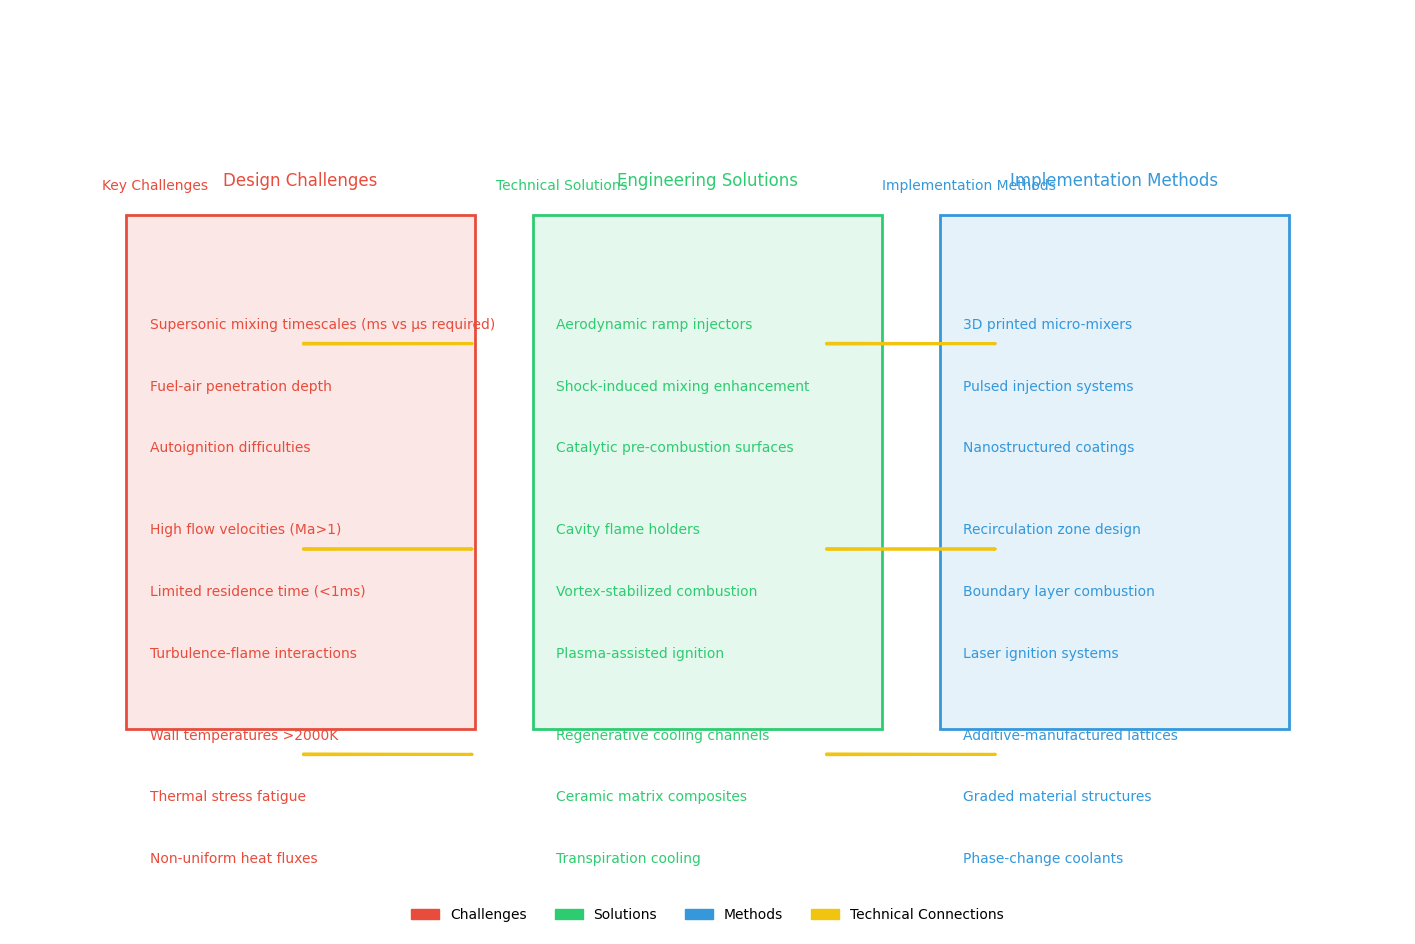

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Rectangle
from matplotlib.colors import LinearSegmentedColormap

# Set up figure
fig, ax = plt.subplots(figsize=(18, 12))
ax.set_facecolor('#0a0a0a')
ax.set_xlim(0, 24)
ax.set_ylim(0, 18)
ax.axis('off')

# Custom color scheme
colors = {
    'challenge': '#e74c3c',
    'solution': '#2ecc71',
    'method': '#3498db',
    'arrow': '#f1c40f'
}

# Draw main sections
def draw_section(x, y, width, height, title, color):
    ax.add_patch(Rectangle((x, y), width, height,
                facecolor=color + '20', edgecolor=color, lw=2))
    ax.text(x + width/2, y + height + 0.5, title,
           color=color, ha='center', va='bottom', fontsize=12)

# Section coordinates
sections = [
    (2, 4, 6, 10, "Design Challenges", colors['challenge']),
    (9, 4, 6, 10, "Engineering Solutions", colors['solution']),
    (16, 4, 6, 10, "Implementation Methods", colors['method'])
]

for x, y, w, h, t, c in sections:
    draw_section(x, y, w, h, t, c)

# Technical content
content = {
    'Fuel Injection': {
        'challenges': [
            "Supersonic mixing timescales (ms vs μs required)",
            "Fuel-air penetration depth",
            "Autoignition difficulties"
        ],
        'solutions': [
            "Aerodynamic ramp injectors",
            "Shock-induced mixing enhancement",
            "Catalytic pre-combustion surfaces"
        ],
        'methods': [
            "3D printed micro-mixers",
            "Pulsed injection systems",
            "Nanostructured coatings"
        ]
    },
    'Flame Stabilization': {
        'challenges': [
            "High flow velocities (Ma>1)",
            "Limited residence time (<1ms)",
            "Turbulence-flame interactions"
        ],
        'solutions': [
            "Cavity flame holders",
            "Vortex-stabilized combustion",
            "Plasma-assisted ignition"
        ],
        'methods': [
            "Recirculation zone design",
            "Boundary layer combustion",
            "Laser ignition systems"
        ]
    },
    'Thermal Management': {
        'challenges': [
            "Wall temperatures >2000K",
            "Thermal stress fatigue",
            "Non-uniform heat fluxes"
        ],
        'solutions': [
            "Regenerative cooling channels",
            "Ceramic matrix composites",
            "Transpiration cooling"
        ],
        'methods': [
            "Additive-manufactured lattices",
            "Graded material structures",
            "Phase-change coolants"
        ]
    }
}

# Draw content blocks
y_positions = {'Fuel Injection': 12, 'Flame Stabilization': 8, 'Thermal Management': 4}

def draw_text_block(x, y, text_items, color):
    for i, text in enumerate(text_items):
        ax.text(x + 0.2, y - i*1.2, text, color=color,
               fontsize=10, va='top', ha='left')

# Add content to sections
for category, position in y_positions.items():
    # Challenges
    draw_text_block(2.2, position, content[category]['challenges'], colors['challenge'])
    # Solutions
    draw_text_block(9.2, position, content[category]['solutions'], colors['solution'])
    # Methods
    draw_text_block(16.2, position, content[category]['methods'], colors['method'])

# Add system arrows
arrow_style = dict(arrowstyle='fancy,tail_width=0.7', color=colors['arrow'], lw=2)
connections = [
    ((5, 11.5), (8, 11.5)),
    ((5, 7.5), (8, 7.5)),
    ((5, 3.5), (8, 3.5)),
    ((14, 11.5), (17, 11.5)),
    ((14, 7.5), (17, 7.5)),
    ((14, 3.5), (17, 3.5))
]

for start, end in connections:
    arrow = FancyArrowPatch(start, end, connectionstyle='arc3,rad=0', **arrow_style)
    ax.add_patch(arrow)

# Add annotations
ax.text(6.5, 15, "Scramjet Combustion Design Elements",
       color='white', fontsize=18, ha='center')
ax.text(2.5, 14.5, "Key Challenges", color=colors['challenge'], ha='center')
ax.text(9.5, 14.5, "Technical Solutions", color=colors['solution'], ha='center')
ax.text(16.5, 14.5, "Implementation Methods", color=colors['method'], ha='center')

# Add legend
legend_elements = [
    Rectangle((0,0),1,1, color=colors['challenge'], label='Challenges'),
    Rectangle((0,0),1,1, color=colors['solution'], label='Solutions'),
    Rectangle((0,0),1,1, color=colors['method'], label='Methods'),
    Rectangle((0,0),1,1, color=colors['arrow'], label='Technical Connections')
]
ax.legend(handles=legend_elements, loc='lower center',
         ncol=4, fontsize=10, frameon=False)

plt.savefig('scramjet_design_challenges.png', dpi=300,
           facecolor='#0a0a0a', bbox_inches='tight')
plt.show()